## Problem Statement:

### **Prepare & Implement a KNN model classify the animals into categorie for Zoo dataset**

# 1. Import Necessary Libraries:

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

In [26]:
from collections import Counter
from plotly.offline import plot as off
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data / Dataset:

In [27]:
zoo_details = pd.read_csv('zoo.csv')
zoo_details

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 3. Data Understanding / Data Exploration / Descriptive Analysis:

## 3.1 Descriptive Analysis:

In [28]:
zoo_details.shape

(101, 18)

In [29]:
zoo_details.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [30]:
zoo_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [31]:
zoo_details.isnull().sum() # No missing/null entries found, so all the entries are valid for use.

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [32]:
zoo_details.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
zoo_details[zoo_details.duplicated()].shape

(0, 18)

In [34]:
zoo_details[zoo_details.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [35]:
zoo_details["type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [36]:
zoo_details['type'].value_counts().sort_index(ascending=True)

1    41
2    20
3     5
4    13
5     4
6     8
7    10
Name: type, dtype: int64

## 3.2 Data Exploration and Visualizaion:

<AxesSubplot:>

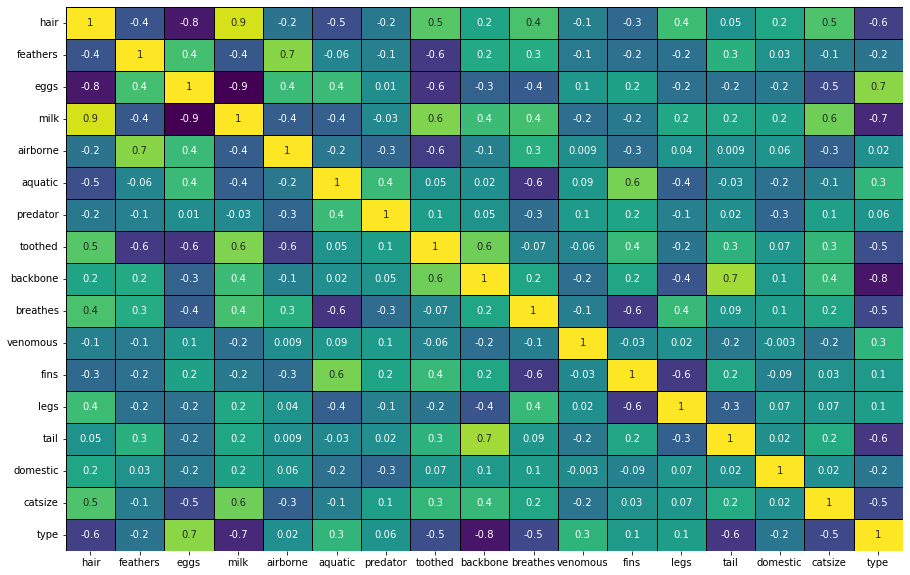

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo_details.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [38]:
list(zoo_details)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

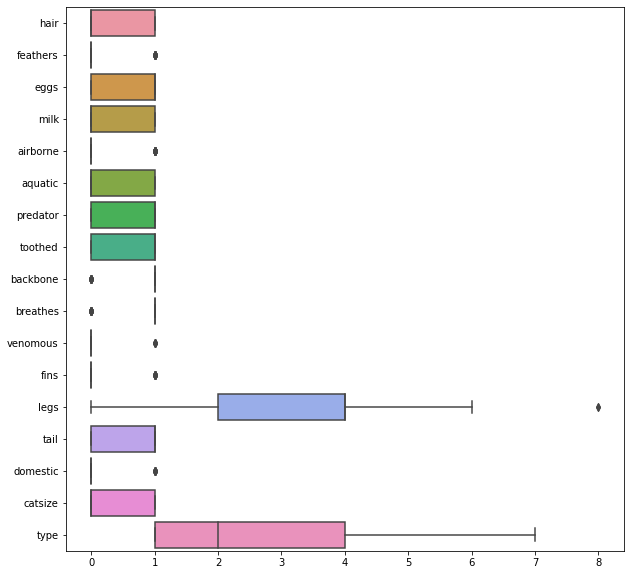

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(data=zoo_details, orient="h");
plt.show()

<AxesSubplot:>

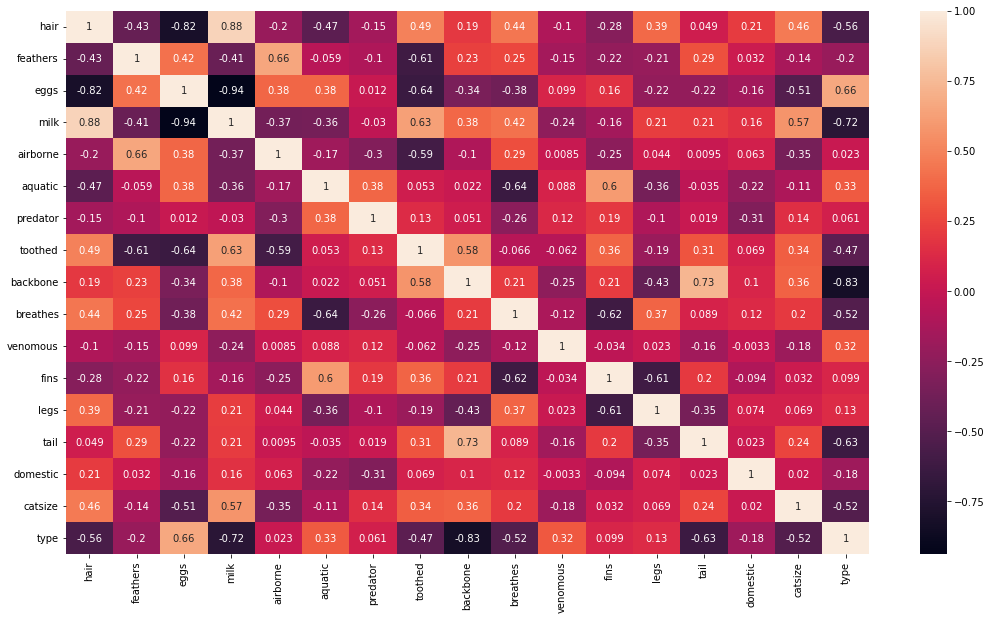

In [47]:
plt.figure(figsize=(18,10))
sns.heatmap(zoo_details.corr(),annot=True)

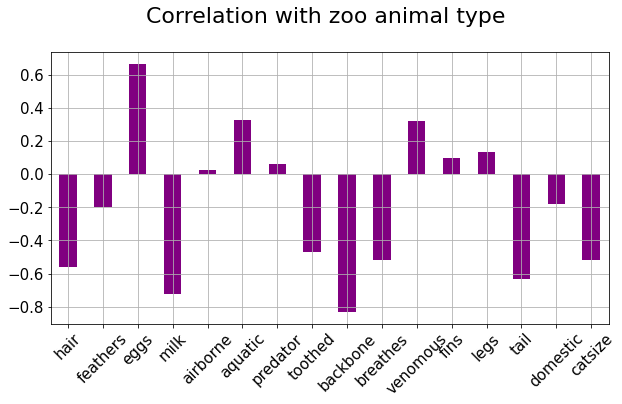

In [49]:
Data = zoo_details.iloc[:,:-1]

correlations = Data.corrwith(zoo_details.type)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 15, 
        color = 'purple',
        rot = 45, grid = True)
plt.title('Correlation with zoo animal type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

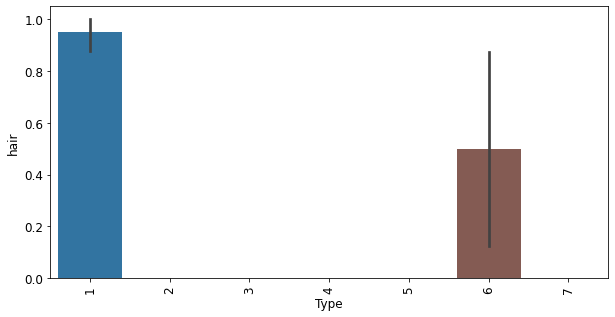

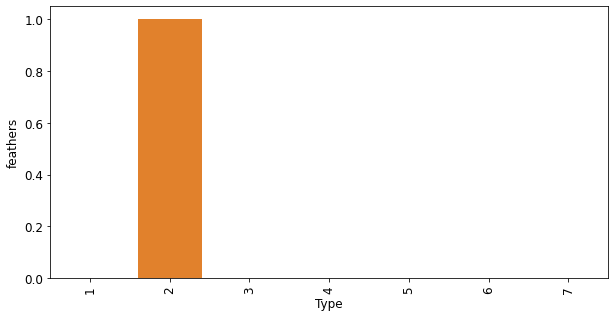

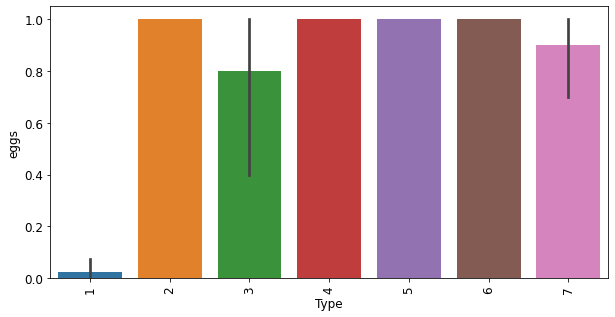

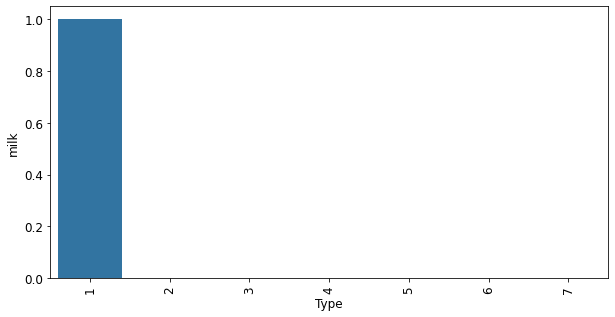

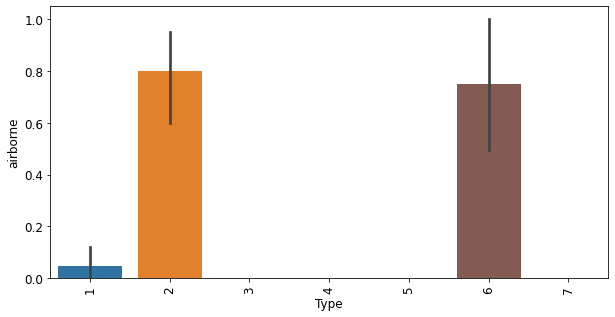

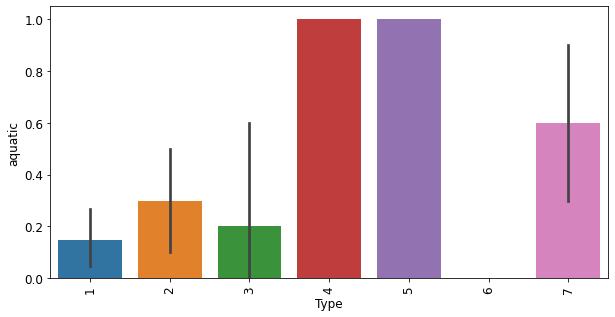

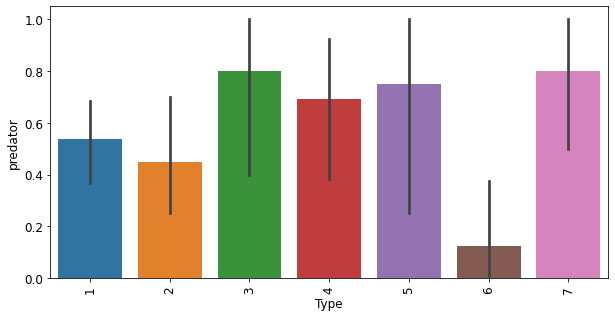

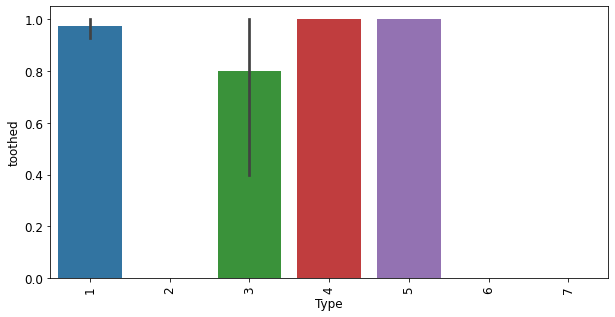

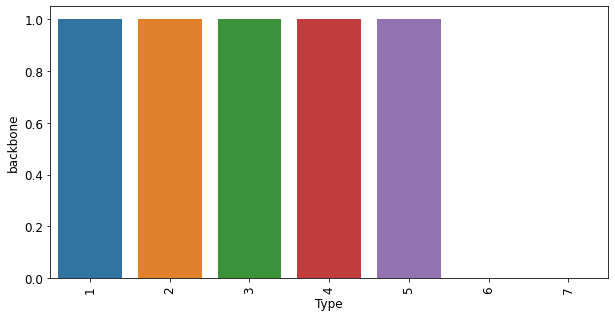

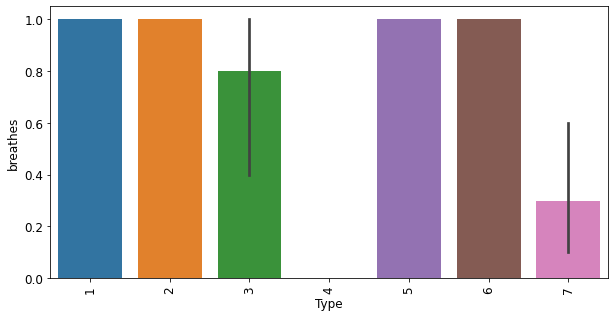

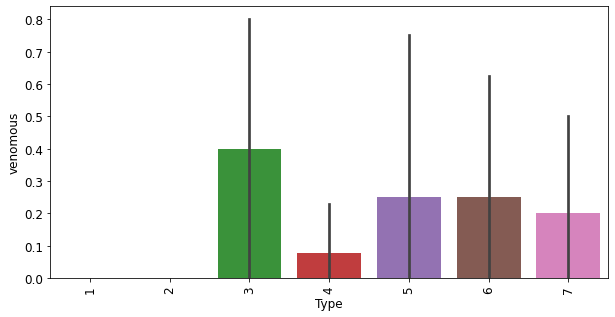

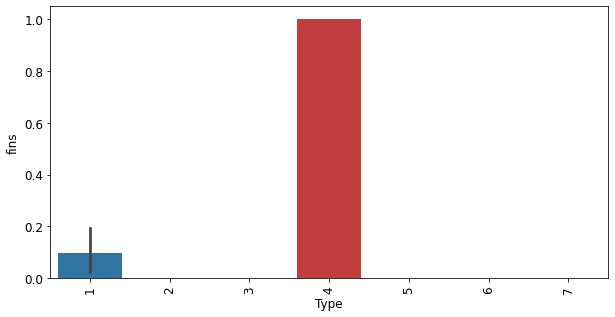

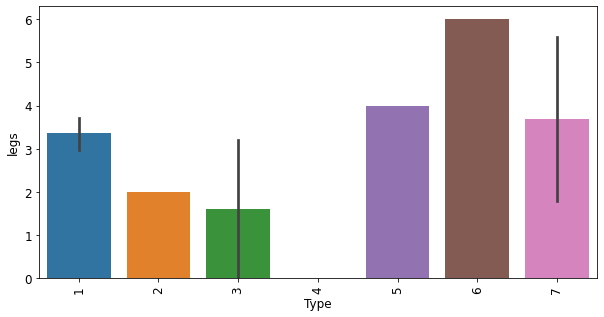

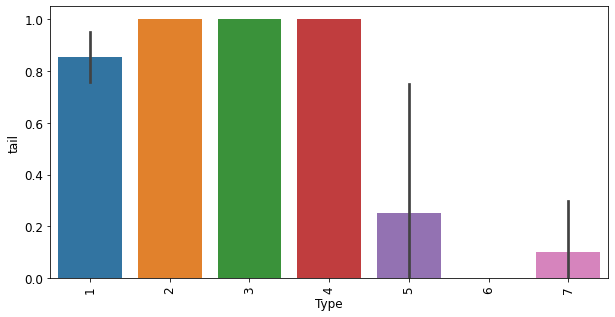

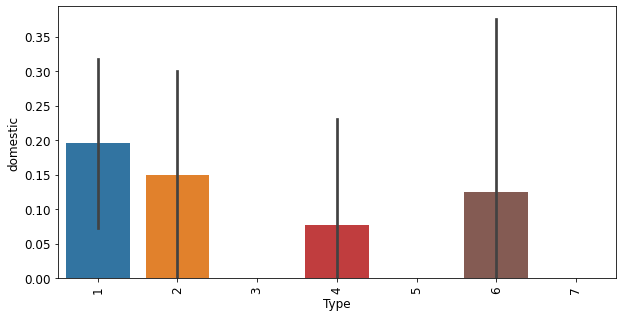

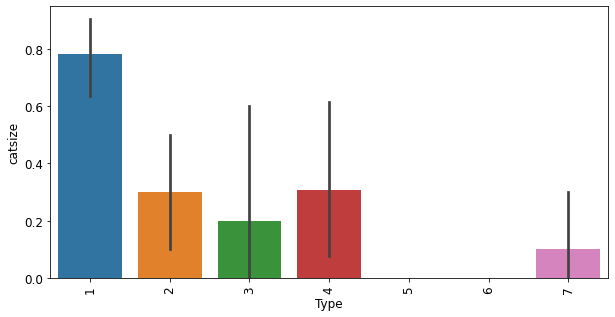

In [50]:
for i in zoo_details.columns[1:-1]:
    plt.figure(figsize=(10,5))
    sns.barplot(x = 'type', y= i,data = zoo_details)
    plt.xticks(rotation = 90, size = 12)
    plt.yticks(size = 12)
    plt.xlabel('Type',fontsize=12)
    plt.ylabel(i, fontsize=12)
    plt.show()

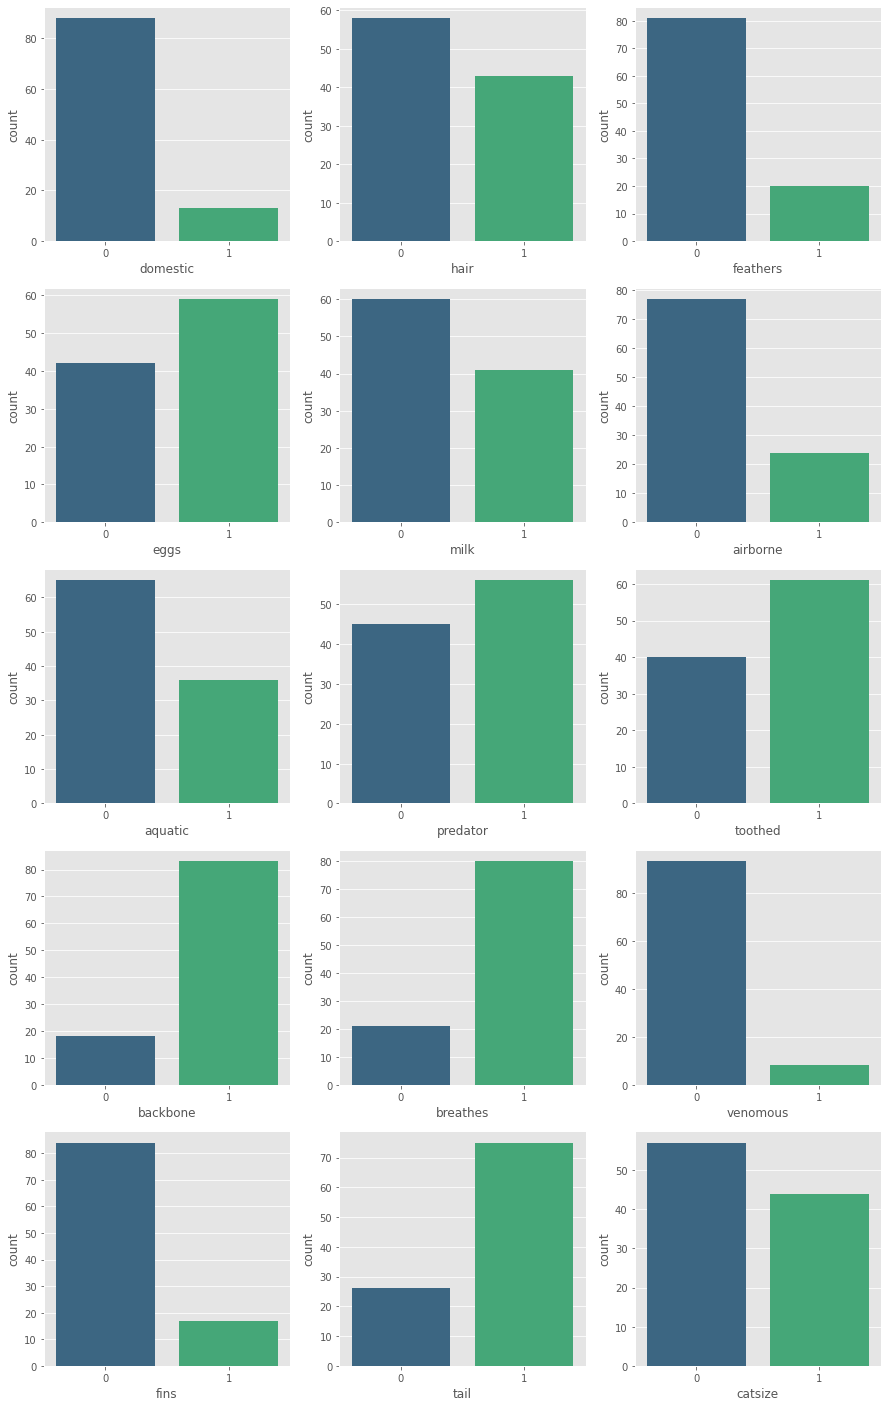

In [51]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(zoo_details["domestic"], palette="viridis", ax=ax[0,0])
sns.countplot(zoo_details["hair"], palette="viridis", ax=ax[0,1])
sns.countplot(zoo_details["feathers"], palette="viridis", ax=ax[0,2])

sns.countplot(zoo_details["eggs"], palette="viridis", ax=ax[1,0])
sns.countplot(zoo_details["milk"], palette="viridis", ax=ax[1,1])
sns.countplot(zoo_details["airborne"], palette="viridis", ax=ax[1,2])

sns.countplot(zoo_details["aquatic"], palette="viridis", ax=ax[2,0])
sns.countplot(zoo_details["predator"], palette="viridis", ax=ax[2,1])
sns.countplot(zoo_details["toothed"], palette="viridis", ax=ax[2,2])

sns.countplot(zoo_details["backbone"], palette="viridis", ax=ax[3,0])
sns.countplot(zoo_details["breathes"], palette="viridis", ax=ax[3,1])
sns.countplot(zoo_details["venomous"], palette="viridis", ax=ax[3,2])

sns.countplot(zoo_details["fins"], palette="viridis", ax=ax[4,0])
sns.countplot(zoo_details["tail"], palette="viridis", ax=ax[4,1])
sns.countplot(zoo_details["catsize"], palette="viridis", ax=ax[4,2]);

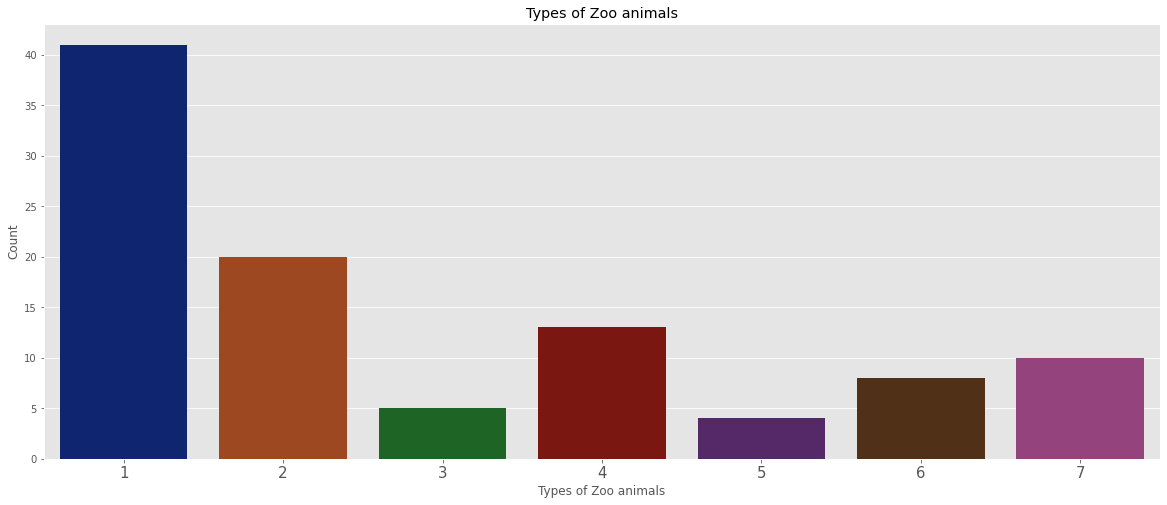

In [52]:
plt.figure(figsize=(20, 8))
    
plt.title("Types of Zoo animals")
sns.countplot(data=zoo_details, x="type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Zoo animals", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [63]:
zoo_details.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

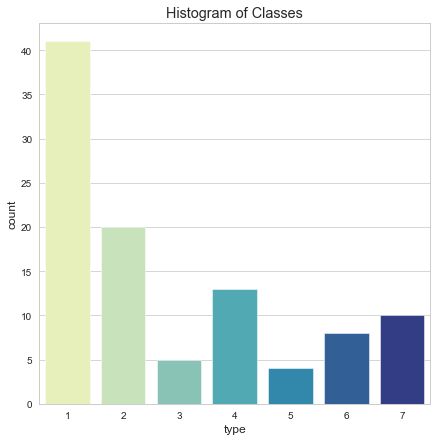

In [64]:
# Set default plot grid:

sns.set_style('whitegrid')

# Plot histogram of classes:

plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(zoo_details['type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")
plt.show()

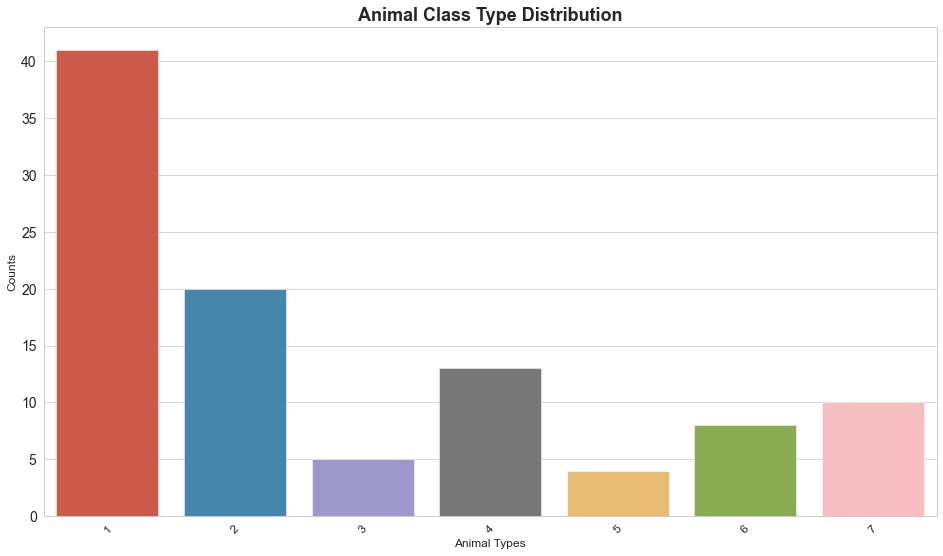

In [65]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = zoo_details['type'].value_counts().index.tolist(), y = zoo_details['type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')
plt.show()
for i in ax.containers:
    ax.bar_label(i,)

<Figure size 576x576 with 0 Axes>

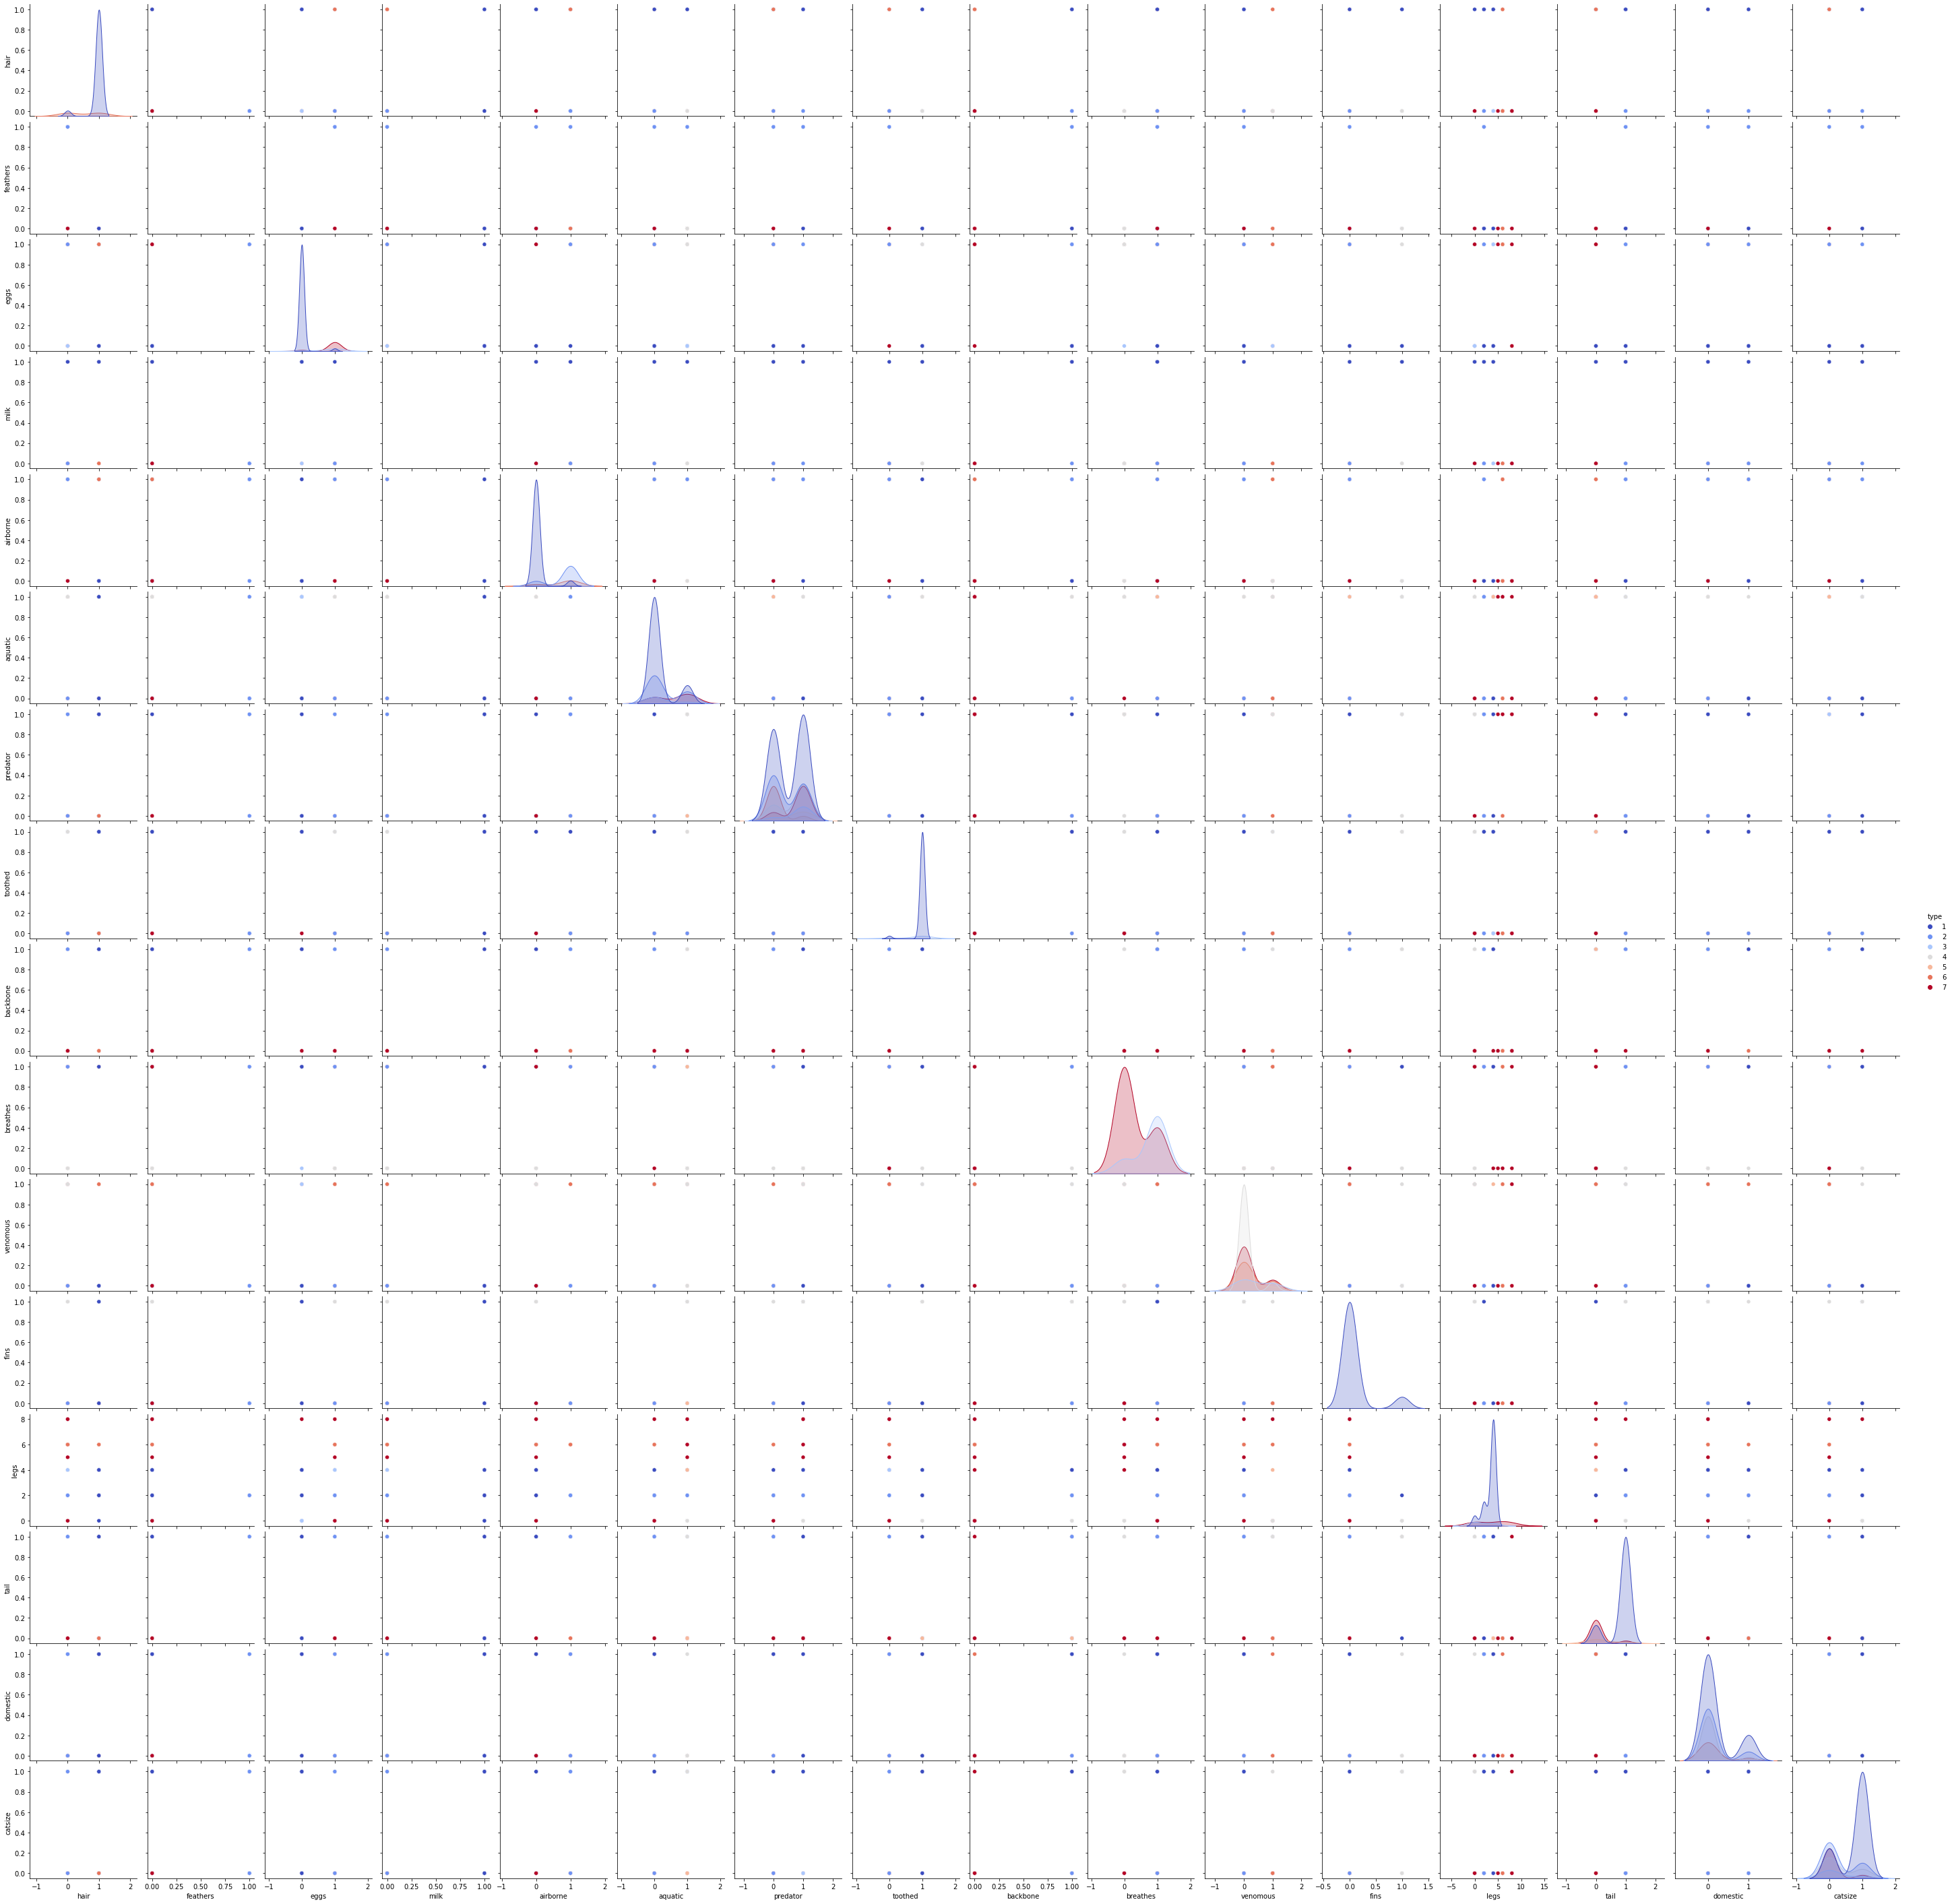

In [44]:
# Pairwise plot of all the features:

plt.figure(figsize=(8,8))
sns.pairplot(zoo_details,hue ='type', palette='coolwarm')
plt.show()

Text(0.5, 1.0, 'Features for the Animals')

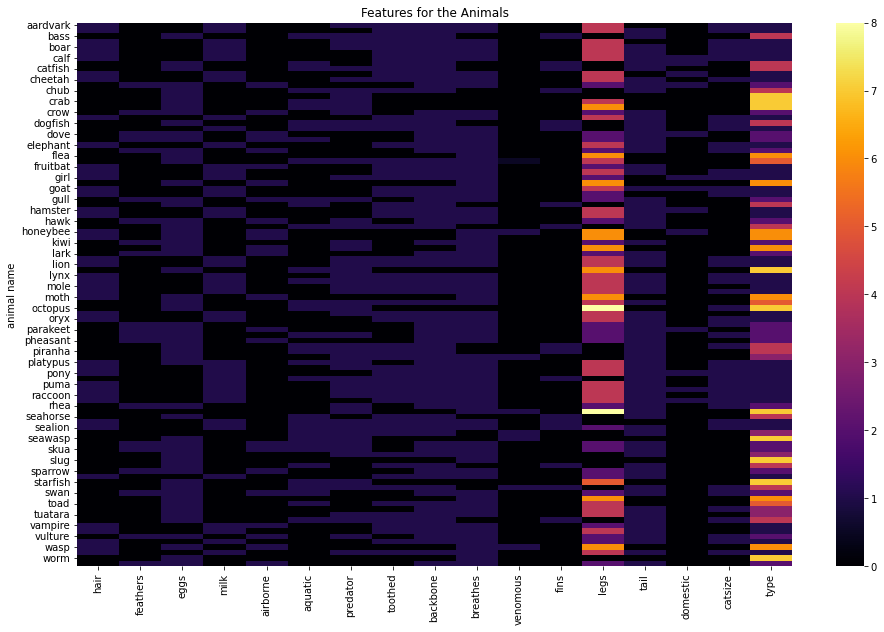

In [46]:
zoo_df_temp = zoo_details.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

1. We can also see if there are any trends or correlations in the data using a heatmap.
2. We want to treat the legs columns differently as it does not present data the same way as the remaining columns. 
3. So, we will create a column has_legs that checks if an animal has legs (1) or not (0).

In [61]:
zoo_df = zoo_details.copy()
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)
zoo_df = zoo_df[['animal name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize','type']]
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


Text(0.5, 1.0, 'Features for the Animals')

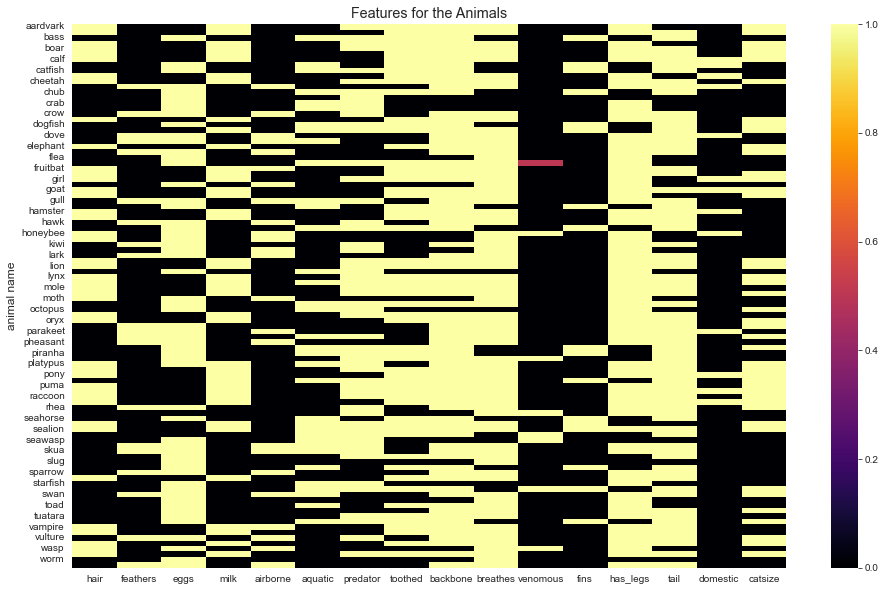

In [62]:
zoo_df_temp = zoo_df.drop(['legs','type'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

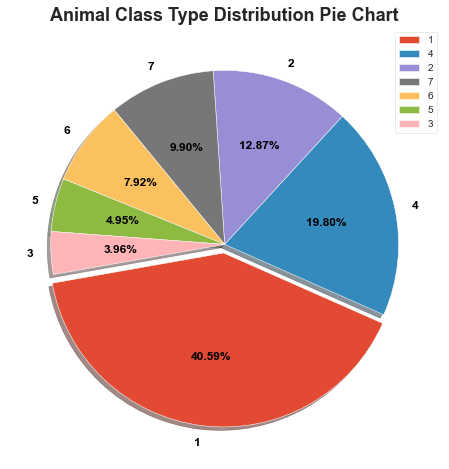

In [59]:
plt.figure(figsize = (12,8))
plt.pie(zoo_details['type'].value_counts(),
       labels=zoo_details.type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Animal Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

The 7 Class Types are:

1. Mammal

2. Fish

3. Bird

4. Invertebrate

5. Bug

6. Amphibian

7. Reptile

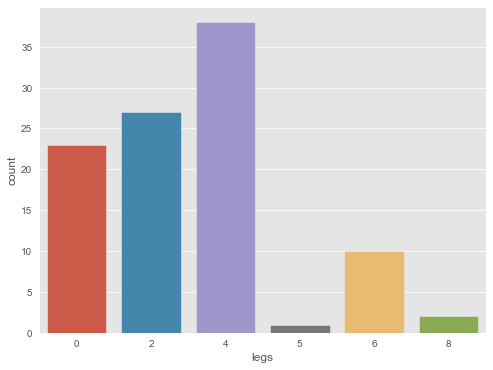

In [66]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(zoo_details["legs"]);

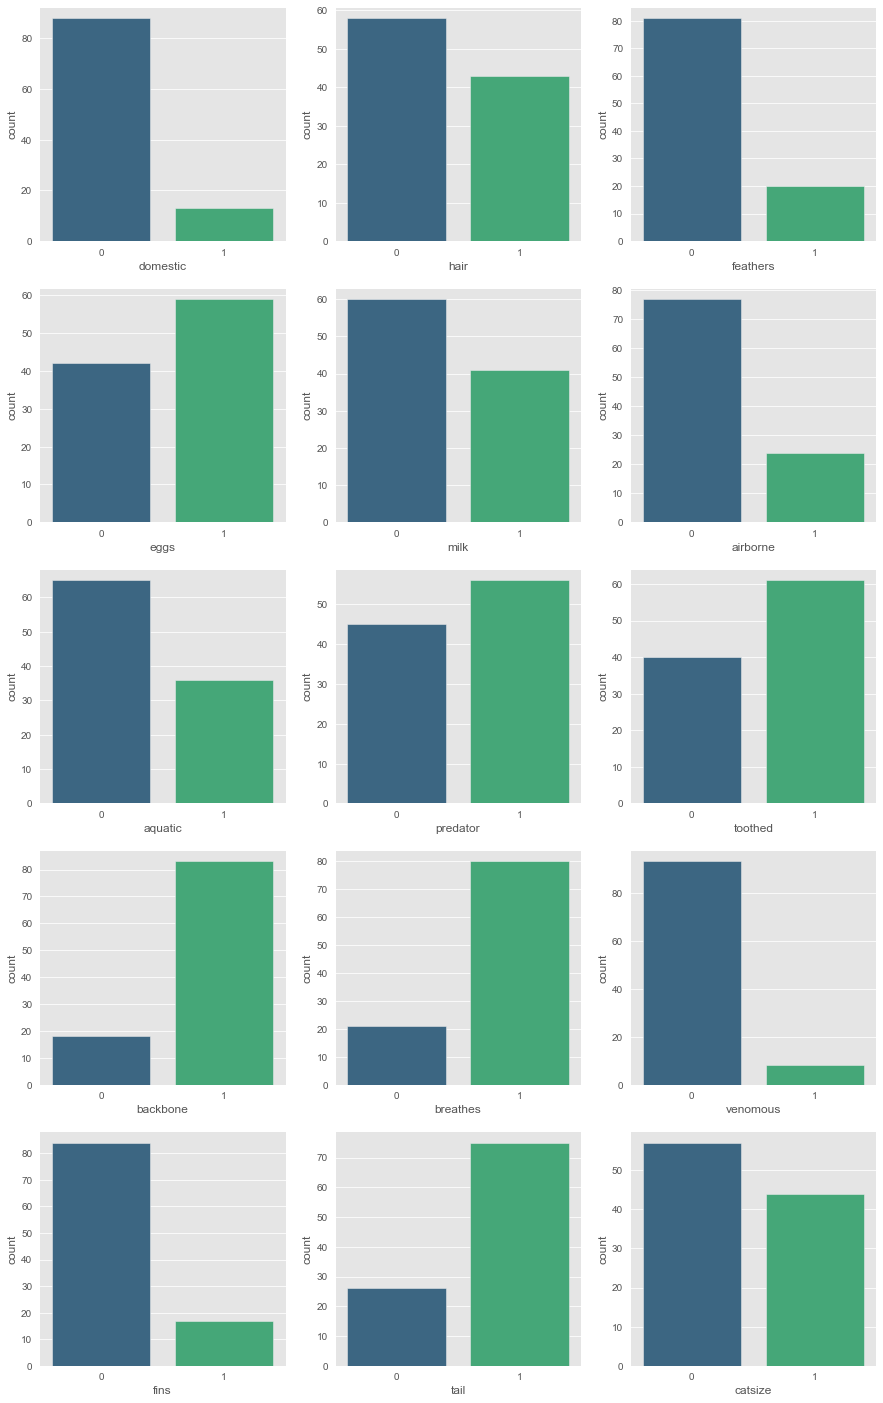

In [67]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(zoo_details["domestic"], palette="viridis", ax=ax[0,0])
sns.countplot(zoo_details["hair"], palette="viridis", ax=ax[0,1])
sns.countplot(zoo_details["feathers"], palette="viridis", ax=ax[0,2])

sns.countplot(zoo_details["eggs"], palette="viridis", ax=ax[1,0])
sns.countplot(zoo_details["milk"], palette="viridis", ax=ax[1,1])
sns.countplot(zoo_details["airborne"], palette="viridis", ax=ax[1,2])

sns.countplot(zoo_details["aquatic"], palette="viridis", ax=ax[2,0])
sns.countplot(zoo_details["predator"], palette="viridis", ax=ax[2,1])
sns.countplot(zoo_details["toothed"], palette="viridis", ax=ax[2,2])

sns.countplot(zoo_details["backbone"], palette="viridis", ax=ax[3,0])
sns.countplot(zoo_details["breathes"], palette="viridis", ax=ax[3,1])
sns.countplot(zoo_details["venomous"], palette="viridis", ax=ax[3,2])

sns.countplot(zoo_details["fins"], palette="viridis", ax=ax[4,0])
sns.countplot(zoo_details["tail"], palette="viridis", ax=ax[4,1])
sns.countplot(zoo_details["catsize"], palette="viridis", ax=ax[4,2]);

# 4. Data Pre-Processing:

In [68]:
zoo_details.drop(['animal name'], axis=1, inplace=True)

In [69]:
zoo_details.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Test Train Split and Cross Validation methods:

In [70]:
x = zoo_details.drop('type',axis=1)
y = zoo_details[['type']]

In [ ]:
# Splitting the dataset into the Training set and Test set:

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [72]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


In [74]:
# Feature Scaling:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### How to choose the value for K:

#### Grid search for choosing the best Value of K

In [75]:
# Get score for different values of n:

k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    score = cross_val_score(knn,x_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [76]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [77]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [78]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


It is recommended to always select an odd value of K ~ When the value of K is set to even, a situation may arise in which the elements from both groups are equal. 

Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

### Visualizing the CV results:

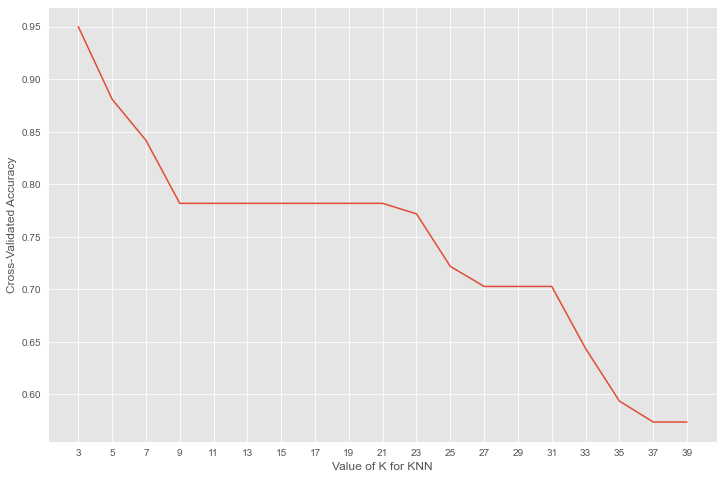

In [79]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 40:

k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation:

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
# plot to see clearly:

plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [80]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


**Here we can see that, we can either take K = 9 or 3**

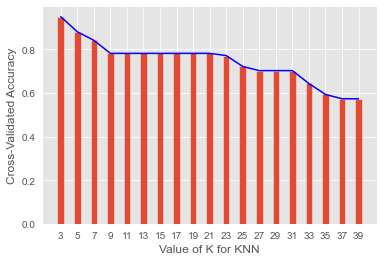

<Figure size 864x576 with 0 Axes>

In [82]:
# choose k between 1 to 20:

k_range = [2*i+1 for i in range(1,20)]
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation:

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
# plot to see clearly:

plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

Text(0, 0.5, 'Error Rate')

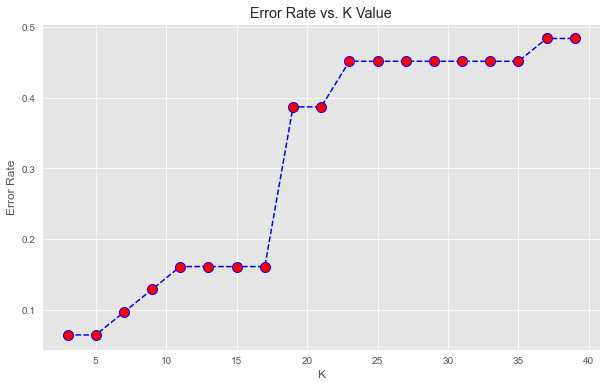

In [83]:
error_rate = []
k_range = [i for i in range(3,40, 2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40, 2)],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Here, we can see that that after K>3 the error rate just tends to over around 0-0.5 Let's retrain the model with that and check the classification report!**

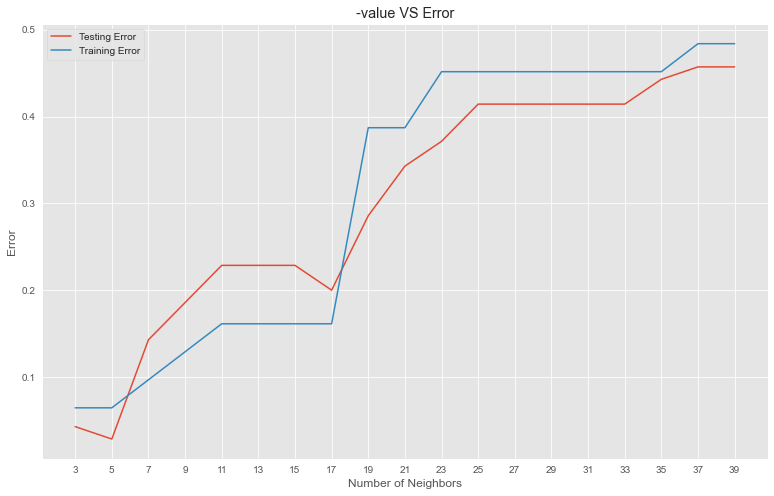

In [84]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))
    
# Plot:

plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

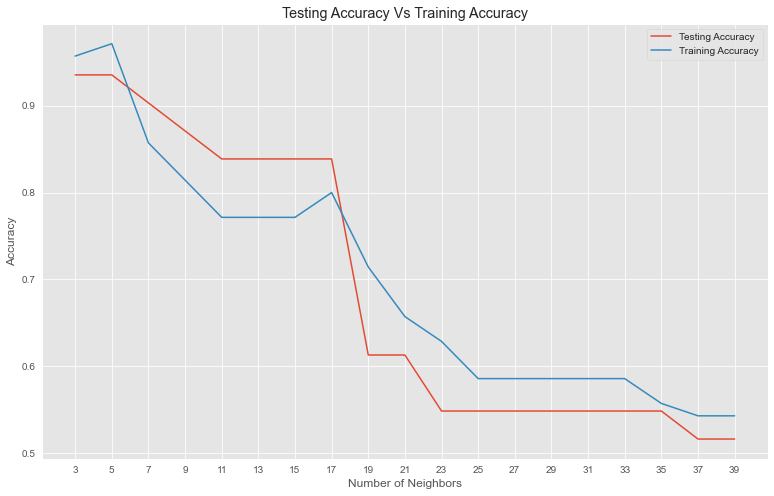

In [86]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
# Fit with knn:
    knn.fit(x_train,y_train)
    
# Train accuracy:
    train_accuracy.append(knn.score(x_train,y_train))
    
# Test accuracy:
    test_accuracy.append(knn.score(x_test,y_test))
    
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Testing Accuracy Vs Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()

**The impact of selecting a smaller or larger K value on the model**

**Larger K value:** The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.

**Smaller k value:** The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.

# We are Applying KNN:

### Applying KNN using K=3

In [87]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



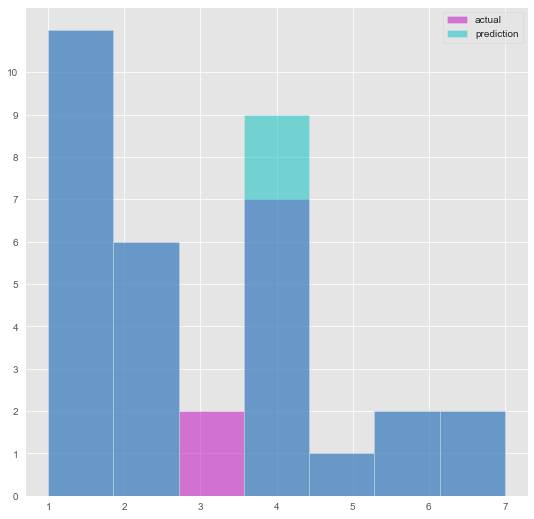

In [88]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

### Applying KNN using K=5

In [90]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



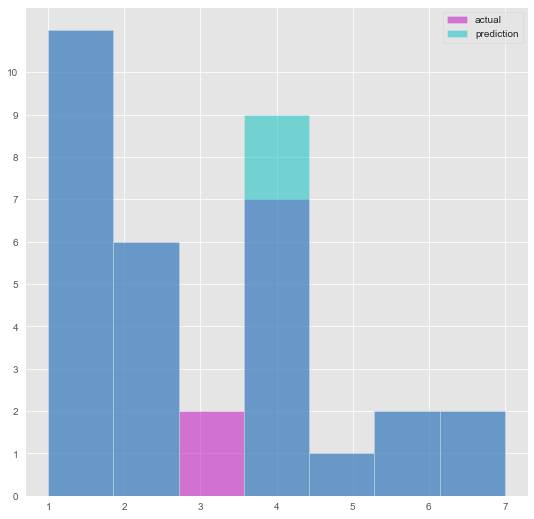

In [91]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

Above figure tells us that the Total number of animals in each class according to the test data and predicted data. We can see that the predictions matches almost all the actual animal classifications (indicated by color overlap) except for one case where the model failed to identify an animal as belonging to class 3 (Reptile), and marked it as being in class 4 (Fish).

So we can see the level of accuracy for this particular classifier.

Now, we know what the model can do at n=5, we should run the model for multiple values of n to find out optimal value of n with respect to this dataset.

So, we've seen how this works when we use all the features values as given. Let's see how this changes if we don't use the values for legs and use has_legs instead as we did when plotting our heatmap.

We will run the exact same code as before changing nothing but using has_legs and not legs.

In [98]:
# Select columns to add to X and y sets:

features = list(zoo_details.columns.values)
features.remove('legs')
features.remove('type')
X2 = zoo_details[features]
y2 = zoo_details['type']

# Split X and y into train and test:

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [99]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X2_train,y2_train)
pred = knn.predict(X2_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y2_test,pred))
print('\n')
print(classification_report(y2_test,pred))

WITH K=5


[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



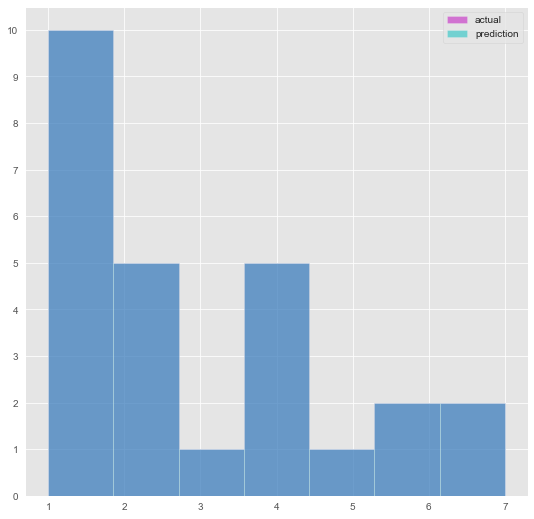

In [100]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

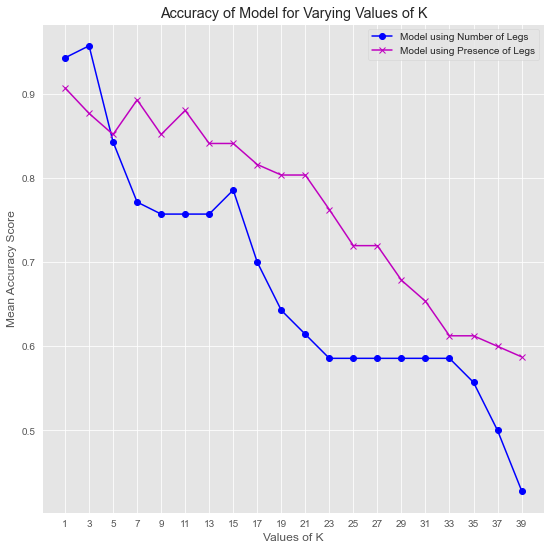

In [101]:
# Get score for different values of n:

k_list = np.arange(1, 40, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=10)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))
    
# Plot n values and average accuracy scores:

plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')

# Added titles and adjust dimensions:

plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

**Inference:**

Replacing the feature legs with has_legs has improved the accuracy of KNN models at every value where n >3
This may be due to the model taking the number of legs as a continuous, numeric data point rather than as an enumerate.

# =========================The End===========================